## setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("/content/drive/My Drive/LCNN/")

import os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt



import imp
import importlib
import LCNN
imp.reload(LCNN)
from LCNN import adjust,accuracy,one_hot
device = torch.device('cuda')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
batchsize=64

trainset = datasets.FashionMNIST('/content/drive/My Drive/data', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('/content/drive/My Drive/data', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batchsize, shuffle=False)
valloader = torch.utils.data.DataLoader(valset, batch_size=batchsize, shuffle=False)

In [ ]:
# Device configuration
device = torch.device('cuda')
# Hyper-parameters 


import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.BN = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 1, 3, 1)
        self.relu2 = nn.ReLU()
        #self.dropout1 = nn.Dropout2d(0.25)
        #self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(144, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        #x = self.BN(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = F.max_pool2d(x, 2)
        #x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        #x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


In [ ]:
activation['fc2']


KeyError: ignored

In [ ]:
output=[]
learning_rate = 0.01
torch.manual_seed(1)
batchnorm=False
device = torch.device('cuda')
model = Net().to(device)
epoch=10000

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
criterion = nn.NLLLoss()

dataiter = iter(train_loader)
images, labels = dataiter.next()

losslist=[]
aclist=[]


for ibt,(data, target) in enumerate(train_loader):
    images, labels = data.to(device), target.to(device)
    break


mod=1
if mod==True:
    model.conv1.register_forward_hook(get_activation('conv1'))
    with torch.no_grad():
        for i in range(32):
            ka=0
            for image in images:
                image=image.reshape([1, 1, 28, 28])
                outputs = model(image).to(device)
                a=activation['conv1']
                t=(torch.sign(a[0][i])+1)/2
                k=torch.sum(t)/(26*26)
                ka=ka+k
            ka=ka/64
            #if (k -0.5)*(k-0.5)> 0.01
            beta= 0.02/((ka -0.5)*(ka-0.5)+0.0001)

            
            print(beta)

            
            if beta>100:
                beta=100
            if beta<0.01:
                beta=0.01

            if beta<1:

                model.conv1.weight[i]=model.conv1.weight[i]/beta
                model.conv1.bias[i]=model.conv1.bias[i]/beta
                model.conv2.weight[0][i]=model.conv2.weight[0][i]*beta





for runsteps in range(epoch):
    outputs = model(images).to(device)
    #if  runsteps==-1:
    #    adjust(model,images,threshold_u=10,threshold_l=0.1,scale=prob,ln=1,oflag=1,mode=2)
    loss = criterion(outputs, labels).to(device)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    lo=loss.item()


    losslist.append(lo)
    if runsteps%10==0:
        print(runsteps,lo)
        #with torch.no_grad():
        #    ac=test(model,device,valloader)
        #    aclist.append(ac)
    if lo<0.001:
        break
output.append([losslist])
ac=test(model,device,valloader)
print(ac)

tensor(2.9548)
tensor(0.1270)
tensor(0.3761)
tensor(1.5452)
tensor(0.3445)
tensor(0.5600)
tensor(0.0988)
tensor(0.8163)
tensor(10.1203)
tensor(0.2135)
tensor(67.5226)
tensor(0.1366)
tensor(3.2277)
tensor(0.3689)
tensor(0.5769)
tensor(16.0837)
tensor(6.4869)
tensor(0.2347)
tensor(0.5611)
tensor(0.6551)
tensor(6.9629)
tensor(3.5379)
tensor(0.2583)
tensor(0.1256)
tensor(1.6332)
tensor(1.4458)
tensor(0.7659)
tensor(3.2034)
tensor(0.3350)
tensor(0.1037)
tensor(0.1013)
tensor(1.5991)
0 2.3047256469726562
10 2.237447738647461
20 1.4897879362106323
30 0.4558227062225342
40 0.08967502415180206
50 0.014307924546301365
60 0.00439117569476366
70 0.0022900558542460203
80 0.001601344789378345
90 0.001304606324993074
100 0.001129439566284418
110 0.0010218076640740037
64.49


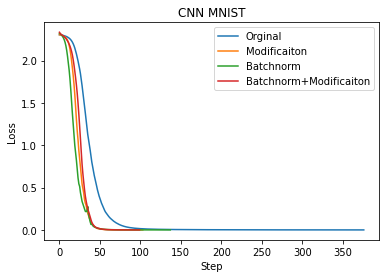

In [ ]:
plt.plot(losslistshadoumeiyou,'-',label='Orginal')####62.35
plt.plot(losslistquanbudouyao,'-',label='Modificaiton') ####65.25
plt.plot(losslistbatchnorm,'-',label='Batchnorm') ####63.73
plt.plot(losslistyouliange,'-',label='Batchnorm+Modificaiton')####55.57

plt.title('CNN MNIST')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Step')
plt.savefig('/content/drive/My Drive/LCNN/plot/CNN3.pdf')

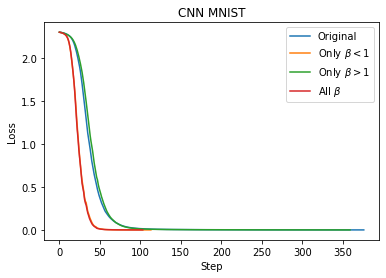

In [ ]:
plt.plot(losslistshadoumeiyou,'-',label='Original')
plt.plot(losslistxiaoyu1,'-',label=r'Only $\beta <1$')
plt.plot(losslistdayuyi1,'-',label=r'Only $\beta >1$')
plt.plot(losslistquanbudouyao,'-',label=r'All $\beta$')


plt.title('CNN MNIST')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Step')
plt.savefig('/content/drive/My Drive/LCNN/plot/CNN4.pdf')

In [ ]:
losslistxiaoyu1=losslist

In [ ]:
losslistdayuyi1=losslist                 

In [ ]:
losslistquanbudouyao=losslist

In [ ]:
losslistshadoumeiyou=losslist

In [ ]:
losslistbatchnorm=losslist

In [ ]:
losslistyouliange=losslist

In [ ]:
acbn=aclist

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    return 100. * correct / len(test_loader.dataset)

In [ ]:
test(model,device,valloader)


Test set: Average loss: 2.3020, Accuracy: 1453/10000 (15%)



In [ ]:
ac=accuracy(model,valloader)

RuntimeError: ignored

In [ ]:
torch.flatten(activation['dropout1'], 1)

KeyError: ignored

In [ ]:
activation['dropout1']

In [ ]:
model = NeuralNet().to(device)
model.dropout1.register_forward_hook(get_activation('dropout1'))

In [ ]:
model.state_dict()['fc'+str(1)+'.weight']

tensor([[ 0.0027,  0.0100, -0.0051,  ..., -0.0101, -0.0084,  0.0011],
        [ 0.0087,  0.0080,  0.0054,  ..., -0.0030,  0.0035, -0.0092],
        [-0.0025,  0.0088, -0.0026,  ..., -0.0056, -0.0057, -0.0089],
        ...,
        [ 0.0054,  0.0016,  0.0035,  ...,  0.0038, -0.0059, -0.0008],
        [-0.0080, -0.0052, -0.0022,  ...,  0.0052,  0.0078, -0.0054],
        [-0.0047, -0.0047,  0.0020,  ...,  0.0097, -0.0075,  0.0002]])

In [ ]:
images

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -0.9843, -1.0000,  ..., -0.9922, -1.0000, -1.0000],
          [-1.0000, -1.000

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
ln=1

In [ ]:
hs=len(model.state_dict()['fc'+str(ln)+'.weight'])

In [ ]:
hs

128

In [ ]:
len(activation['dropout1'][0])

64

In [ ]:
output = model(images.to(device)).to(device)

In [ ]:
adjust(model,torch.flatten(activation['dropout1'], 1),threshold_u=10,threshold_l=0.01,scale=0.8,ln=1,oflag=2)

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan])
Adjusting Layer 1, Kernel Nodes: 0, Adptive Nodes0


In [ ]:
 L=len(images)

In [ ]:
L

64

In [ ]:
hs=len(model.state_dict()['fc'+str(ln)+'.weight'])

In [ ]:
hs

128

In [ ]:
d_=torch.zeros(hs).to(device)

In [ ]:
for i in range(hs):
            d=0
            for k in range(L):
                image=images[k]
                l=-model.state_dict()['fc'+str(ln)+'.weight'][i]/model.state_dict()['fc'+str(ln)+'.bias'][i]
                image=torch.min(image,torch.tensor(0.0001))
                x_k=1/image.to(device)

                d_k=(torch.abs(torch.sum(l*x_k)-1.0)/torch.norm(x_k))
                d=d+d_k


In [ ]:
images=torch.flatten(activation['dropout1'], 1)

In [ ]:
print(d_)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
print(image)

tensor([1.0000e-04, 1.0000e-04, 1.0000e-04,  ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00])


In [ ]:
torch.flatten(activation['dropout1'], 1)

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])